1

1.a)

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


El objetivo de la linea 4 es que las columnas 'id', 'date' y 'zipcode' sean removidas de la tabla

1.b)

In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Se logra apreciar que en total hay 18 características en la tabla, y por lo tanto 18 columnas. Se observa además que hay 21613 filas (o datos), y que no existen datos nulos. Por otro lado, se tienen valores estadísticos para las distintas columnas tales como la media, el máximo, el mínimo, etc.

1.c)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Hay cierto algoritmos de maquinas de aprendizaje que se ven beneficiados por esta accion. Por ejemplo, hay ciertos clasificadores que, si uno de sus atributos posee un gran  rango de valores, ciertas operaciones (como distancia euclidiana) se veran gobernadas por estos atributos, es decir, daran mas prioridad de la que merecen a estos. Otra razon es que ciertos metodos, como gradiente descendiente convergen mas rapido al normalizar. 
Para explicar la transformación aplicada, sería buena idea plasmar los datos en una gráfica antes y después de esta.

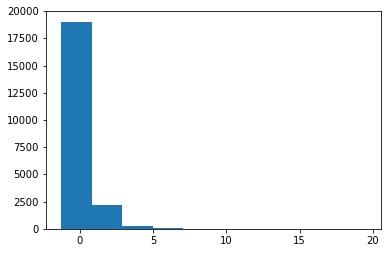

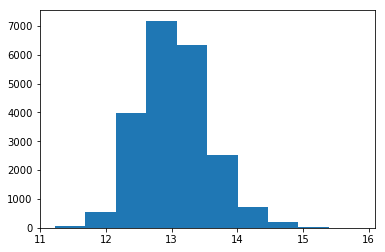

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df_scaled['price'])
plt.show()
df_scaled['price'] = np.log(df['price'])
df_scaled.head()
plt.hist(df_scaled['price'])
plt.show()

Se logra apreciar el comportamiento exponencial negativo que poseen los datos incialmente, siendo además que se concentran en valores cercanos a 0. Al aplicar logaritmo a estos datos, se distribuyen de mejor manera y se les da más significancia.

1.d)

In [6]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version #quita la columna price
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))#inserta la columna 'intercept' con valor 1.0
y = df_scaled['price']
##mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

El paso de la línea 4 se agrega debido a que el modelo lineal se define de la siguiente forma:
$$ \hat{y} = \beta_0 + \sum_{i=1}^{n} \hat{\beta_i} x_i  $$

Donde $\hat{\beta_i}$ es el peso del i-esimo atributo, $x_i$ es el i-esimo atributo del input $x$ y $b_0$ es el intercepto.
En modo vectorial esto se puede anotar como:
$$ \hat{y} = \beta_0 +\hat{\beta}^T X $$

A modo de notación y para simplicidad de operaciones, el vector $\beta_0$ puede incluirse dentro del vector $\hat{\beta}^T$, siempre y cuando en la última posición del vector input $X$ se agrege un 1, de tal forma de que al multiplicarlos, se logre sumar $\beta_0$.

Los parametros que se le entregan a lm.LinearRegression son:

- fit_intercept: por default es True. Si es False, significa que los datos ingresados ya estaran centrados
- normalize: Por default es False. Si es True, los regresores seran normalizados
- copy_X: por default es True. Si es True, X sera copieda. En caso contrario, sera sobreescrito
- n_jobs: por default es 1. Es el numero de trabajos usados para computar

El metodo fit recibe Xtrain e ytrain, quienes son la data de entrenamiento para la maquina (correspondiente al 70% de la data total). Xtrain posee todos los datos de las filas excepto el precio e ytrain posee el precio de cada fila asociada, dado que es la variable de estudio.

1.e)

In [7]:
linreg.coef_ #pesos(creo) de cada atributo

predicciones = linreg.predict(Xtrain)

deltas = ytrain-predicciones   #y en la parte 1.d era la columna precio. Con istrain le aplico mascara pra selccionar datos
numerador1 = ( deltas.dot(deltas) )**0.5
denominador1 = len(deltas) - len(linreg.coef_) - 1
theta = numerador1 /  denominador1

xt = np.transpose(Xtrain)
xtx = ( xt.dot(Xtrain) )
vjj = np.linalg.inv(xtx)

j=0
for i in linreg.coef_:
    peso = i
    z_score = i/( theta*( vjj[j][j] )**0.5 )
    j+=1
    print (str(peso) + "\t\t\t" + str(z_score))
print(np.linalg.cond(Xtrain))#numero condicion matriz a

-0.00610927147334			-275.454368625
0.056116828631			1806.200733
-4.17876976902e+12			nan
0.0208614534206			878.997141336
0.0368335169921			1477.37477225
0.033250311163			1802.11827985
0.0422977480631			2148.1547837
0.0467801812874			2607.66662256
0.183934892651			5835.06381735
3.76769104526e+12			nan
2.01365075838e+12			nan
-0.109375			-4133.76678698
0.015869140625			907.997827208
0.1875			10612.9495965
-0.00454711914062			-217.801208262
0.087890625			2962.45233509
-0.00537109375			-220.894919472
13.0390930176			764419.64689
3.78470305733e+15


/home/nicomero/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


1.f)

Se puede ver que hay valores de z-score que dan como resultado NaN (not a number). Esto se puede deber a las caracteristicas de la matriz Xtrain, la cual esta mal condicionada (su numero de condicion es significativamente mayor que 1). Este mal condicionamiento puede ser debido a que hay columnas (atributos) que son linealmnete dependientes (o muy cercanas a serlo) de otras. Para solucionar esto, se pueden quitar aquellas columnas que poseen dependencia lineal (tales como las de área).

In [8]:
Xtrain.drop(['sqft_living','sqft_above','long', 'sqft_living15', 'sqft_lot15'],axis=1,inplace=True)
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)


predicciones = linreg.predict(Xtrain)

deltas = ytrain-predicciones   #y en la parte 1.d era la columna precio. Con istrain le aplico mascara pra selccionar datos
numerador1 = ( deltas.dot(deltas) )**0.5
denominador1 = len(deltas) - len(linreg.coef_) - 1
theta = numerador1 /  denominador1

xt = np.transpose(Xtrain)
xtx = ( xt.dot(Xtrain) )
vjj = np.linalg.inv(xtx)

j=0
for i in linreg.coef_:
    peso = i
    z_score = i/( theta*( vjj[j][j] )**0.5 )
    j+=1
    print (str(peso) + "\t\t\t" + str(z_score))
print(np.linalg.cond(Xtrain))#numero condicion matriz a

0.0194448111977			876.229712986
0.0935538600908			3003.29460496
0.0304547654671			1742.76962791
0.0459990515216			1803.2213691
0.0347426388617			1788.63555872
0.053092341232			2593.77008696
0.0429875713554			2277.57085877
0.285921405035			11164.5347341
0.0352367922573			1576.16330938
-0.115826819026			-4479.3504769
0.0120107886275			653.525791143
0.184088317824			9911.25367632
13.0423525266			726322.365438
3.56313034416


/home/nicomero/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1.g)

In [9]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / 10

ValueError: shapes (6484,18) and (13,) not aligned: 18 (dim 1) != 13 (dim 0)

1.h)

2

2.a)

In [7]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1 #cantidad de atributos 
    k = min(p, k) #maxima cantidad de atributos elegidos
    names_x = np.array(names_x) #nombres de los atributos
    remaining = list(range(0, p)) 
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k : #mientras queden atributos por agregar y no se supere el maximo
        score_candidates = []
        
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate] #atriubtos que son los mejores + un atributo de los que queda
            x_train = x[:,indexes]
            
            predictions_train = model.fit(x_train, y).predict(x_train)
            
            #parte en que aplica una metrica para los atributos
            #al parecer es conveniente usar F statistic
                #pagina 7 en el texto guia en moodle
                #http://analyticspro.org/2016/03/15/r-tutorial-how-to-interpret-f-statistic-in-regression-models/
            
            residuals_train = predictions_train - y
            mse_candidate = (residuals_train.dot(residuals_train)/len(residuals_train))**0.5
            
            score_candidates.append((mse_candidate, candidate)) #arma una tupla con el error y el candidato
        
        score_candidates.sort() #ordena por los errores mas chicos
        #score_candidates[:] = score_candidates[::-1] #invierte la lista
        best_new_score, best_candidate = score_candidates[0]#.pop() #saca el mejor atributo (esta al final de la lista)
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected
names_regressors = X.columns[:-1] #without intercept
fss(Xm,ym,names_regressors)

selected = grade ...
totalvars=2, mse = 0.378497
selected = lat ...
totalvars=3, mse = 0.321466
selected = sqft_living ...
totalvars=4, mse = 0.291479
selected = yr_built ...
totalvars=5, mse = 0.274676
selected = view ...
totalvars=6, mse = 0.267921
selected = sqft_living15 ...
totalvars=7, mse = 0.264536
selected = bathrooms ...
totalvars=8, mse = 0.261248
selected = condition ...
totalvars=9, mse = 0.258581
selected = waterfront ...
totalvars=10, mse = 0.256585
selected = floors ...
totalvars=11, mse = 0.255161
selected = sqft_lot ...
totalvars=12, mse = 0.254598
selected = yr_renovated ...
totalvars=13, mse = 0.254203
selected = bedrooms ...
totalvars=14, mse = 0.254133
selected = sqft_above ...
totalvars=15, mse = 0.254075
selected = sqft_lot15 ...
totalvars=16, mse = 0.254022
selected = long ...
totalvars=17, mse = 0.254001
selected = sqft_basement ...
totalvars=18, mse = 0.254029


[17, 8, 13, 2, 11, 6, 15, 1, 7, 5, 4, 3, 12, 0, 9, 16, 14, 10]

3

3.a)

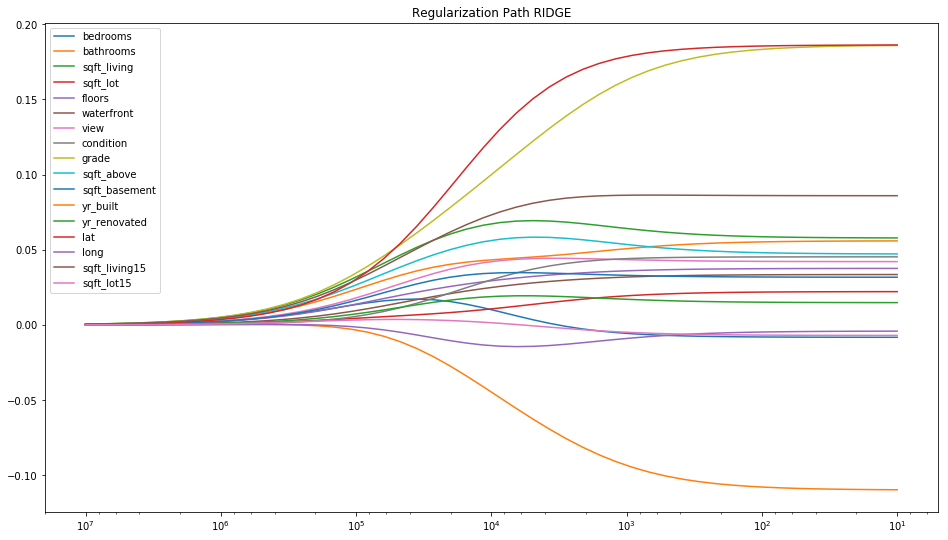

In [8]:
#se grafica los pesos que se da a cada parametro variando el lambda--->alpha

from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)  #quita el intercepto
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')  #pide que la regresion tome en cuenta el intercepto desde dentro
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
plt.figure(figsize = (16,9))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

3.b)

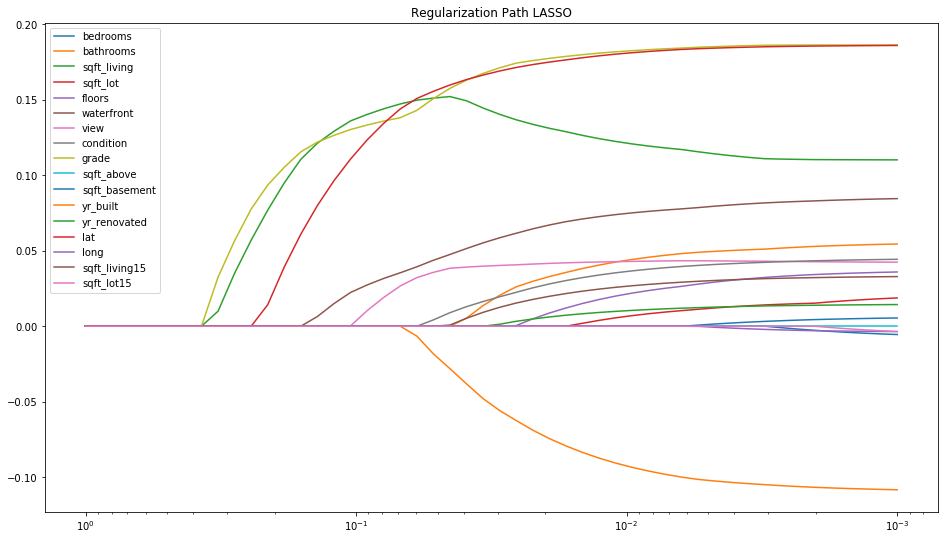

In [9]:

from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)  #quita el intercepto
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
plt.figure(figsize = (16,9))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

3.c)

In [10]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = #choose it
coefs = []
model = #choose it
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax

SyntaxError: invalid syntax (<ipython-input-10-2a2c71448f45>, line 3)

In [ ]:
3.d)

In [ ]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = #choose it
alphas_ = #alphas to evaluate
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
        for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

4

In [13]:
df_A = df_scaled.sample(1000,random_state=11)

frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11) #crea el dataframe

4.a)

In [14]:
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

4.b)

In [16]:
#SE CREAN Y ENTRENENAN LOS MODELOS
modA = lm.LinearRegression(fit_intercept = True)
modB = lm.LinearRegression(fit_intercept = True)

modA.fit(Xtrain_A,ytrain_A)
modB.fit(Xtrain_B,ytrain_B)

#CADA MODELO PREDICE SU CONJUNTO DE VALIDACION
valpredA_A = modA.predict(Xval_A)
valpredB_B = modB.predict(Xval_B)

#CADA MODELO PREDICE EL OTRO CONJUNTO DE VALIDACION
valpredA_B = modA.predict(Xval_B)
valpredB_A = modB.predict(Xval_A)

#DIFERENCIAS DE LAS PREDICCIONES CON EL VALOR REAL
deltaA_A = valpredA_A - yval_A
deltaB_B = valpredB_B - yval_B

deltaA_B = valpredA_B - yval_B
deltaB_A = valpredB_A - yval_A

#SE CALCULA LA SUMA DE LAS DIFERENCIAS AL CUADRADO
errorA_A = deltaA_A.dot(deltaA_A) /len(deltaA_A)
errorB_B = deltaB_B.dot(deltaB_B) /len(deltaB_B)


errorA_B = deltaA_B.dot(deltaA_B) /len(deltaA_B)
errorB_A = deltaB_A.dot(deltaB_A) /len(deltaB_A)

#SE IMPRIMEN
print(errorA_A)
print(errorB_B)

print(errorA_B)
print(errorB_A)

0.0712808717813
0.118938373093
0.151424942814
0.0828490228399


4.c)

5

5.a)

In [7]:
import pandas as pd
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', \
'angina','oldpeak','slope','vessel','thal','normal']
dataset = 'heart.dat'
df = pd.read_csv(dataset, header=None, names=headers, sep=' ')
#create your matrix
df.head()

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)


5.b)

In [ ]:
from sklearn.metrics import accuracy_score
print "Score: "%(accuracy_score(y_outlier,y_predict_outlier)